We import the dataset and check the data types of each column to understand the structure of the data.

In [5]:
import pandas as pd

df = pd.read_csv('house.csv')

print(df.isnull().sum())
for col in df.columns:
    print(f'{col}: {df[col].dtype}')



bedroom_count      0
net_sqm            0
center_distance    0
metro_distance     0
floor              0
age                0
price              0
dtype: int64
bedroom_count: int64
net_sqm: float64
center_distance: float64
metro_distance: float64
floor: int64
age: int64
price: float64


Now we know that our columns contain numeric values, so encoding is not required. Next, I will create a heatmap to visualize the correlation between the variables.

Text(0.5, 1.0, 'Correlation Heatmap')

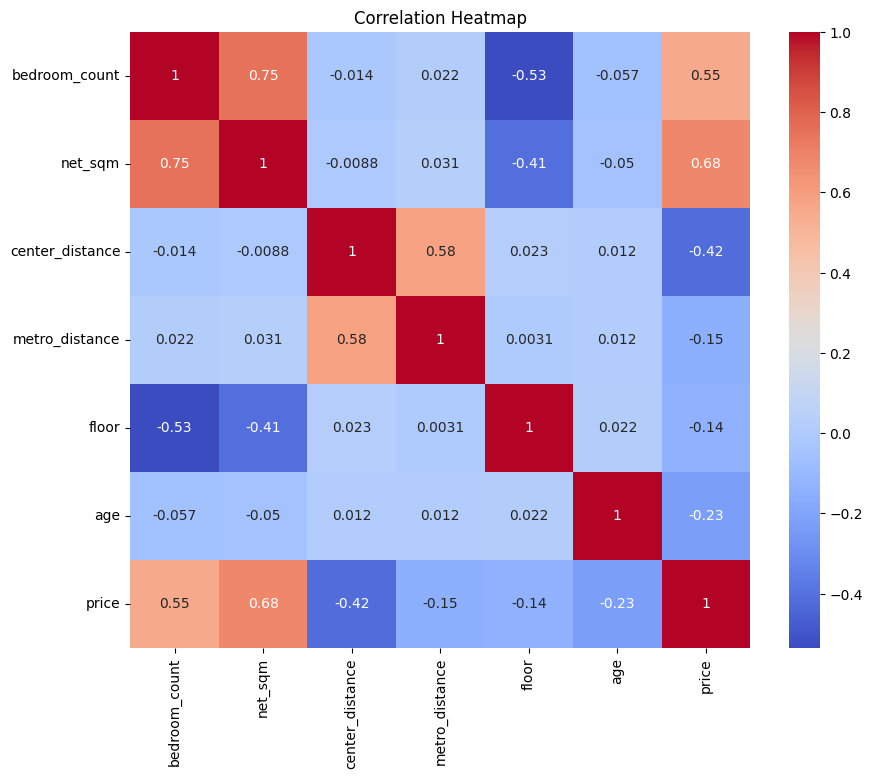

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True , cmap='coolwarm')
plt.title('Correlation Heatmap')

The columns `bedroom_count` and `net_sqm` have a high correlation, which can cause multicollinearity issues in the model.  
Since `bedroom_count` has less impact on the target column (`price`) compared to `net_sqm`, I have decided to remove the `bedroom_count` column from the dataset.

In [21]:
X = df.drop(['price','bedroom_count'], axis=1).values
y = df['price']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state = 42)

model = LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

Now it's time to test our model. We will use the test data for evaluation and create a graph to visualize the results.

R^2 Score : 0.7180443926611138


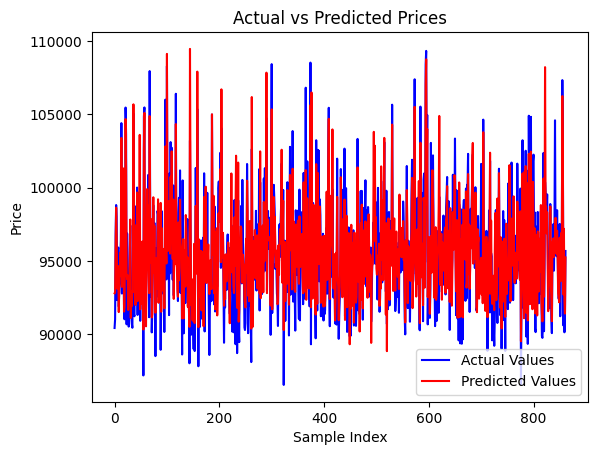

In [36]:
y_pred = model.predict(X_test)

from sklearn.metrics import r2_score

r2 = r2_score(y_test,y_pred)
print(f'R^2 Score : {r2}')

plt.plot(range(len(y_test)), y_test, color='b' , label='Actual Values')
plt.plot(range(len(y_test)), y_pred, color='Red' , label='Predicted Values' )
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.title('Actual vs Predicted Prices')
plt.show()